<a href="https://colab.research.google.com/github/amadords/Projetos-Publicos/blob/master/Clustering_com_Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering
---

O Spotify é um serviço de *streaming* de áudio utlizada por milhões de usuários em todo mundo. (320 milhões de usuários segundo a última nota divulgada em Outubro de 2020).

<center><img width="60%" src="https://image.freepik.com/fotos-gratis/mulher-atrasando-um-spotify-icone-isolado_53876-64898.jpg"></center>

Já trabalhamos anteriormente criando um classificador de músicas do Spotify, que pode ser visto [aqui](https://bit.ly/3l44ELf
). Lá utilizamos features como `dancibilidade`, `energia` e `instrumentalidade` das músicas para encontrar um padrão entre as features das músicas e suas avaliações.

No presente *notebook* vamos criar *clusters* baseados nas mesmas *features*. Antes de falar dos *clusters*, vamos às *features*.


## Features

* **'id'**
    * O número de identificação da música
* **'acousticness'**
    * Indica se a música é ou não acústica, 0,0 para não acústica e 1,0 para o máximo de acusticidade.
* **'danceability'**
    * Descreve como uma faixa é adequada para dançar com base em uma combinação de elementos musicais, incluindo tempo, estabilidade de ritmo, força de batida e regularidade geral. Um valor de 0,0 é menos dançável e 1,0 é mais dançante.
* **'duration_ms'**
    * A duração da faixa de música em milissegundos
* **'energy'**
    * É uma medida de 0,0 (menos energética possivel) a 1,0 (mais energética possivel) que representa uma medida de intensidade e atividade da música. Normalmente, as faixas energéticas parecem rápidas, altas e barulhentas. Por exemplo, death metal tem alta energia, enquanto um prelúdio de Bach tem pontuação baixa na escala. As características perceptivas que contribuem para este atributo incluem faixa dinâmica, intensidade percebida, timbre, taxa de início e entropia geral.
* **'instrumentalness'**
     * Prediz se uma faixa não contém vocais. Os sons “Ooh” e “aah” são tratados como instrumentais neste contexto. Faixas de rap ou palavra falada são claramente “vocais”. Quanto mais próximo o valor da instrumentalidade estiver de 1,0, maior será a probabilidade de a faixa não conter conteúdo vocal. Valores acima de 0,5 destinam-se a representar faixas instrumentais, mas a confiança é maior à medida que o valor se aproxima de 1,0. 
* **'key'**
    * Basicamente o tom da música, onde: 
        * 0 = C
        * 1 = Db
        * 2 = D
        * 3 = Eb
        * 4 = E
        * 5 = F
        * 6 = Gb
        * 7 = G
        * 8 = Ab
        * 9 = A
        * 10 = Bb
        * 11 = B
* **'liveness'**
    * Detecta a presença de um público na gravação. Valores de vivacidade mais altos representam um aumento na probabilidade de a trilha ter sido executada ao vivo. Um valor acima de 0,8 fornece uma grande probabilidade de que a faixa esteja ao vivo. 
* **'loudness'**
    * O volume geral de uma faixa em decibéis (dB). Os valores de intensidade são calculados em toda a faixa e são úteis para comparar a intensidade relativa das faixas. Loudness é a qualidade de um som que é o principal correlato psicológico da força física (amplitude). Os valores típicos variam entre -60 e 0 db. 
* **'speechiness'**
    * Detecta a presença de palavras faladas em uma faixa. Quanto mais exclusivamente falada for a gravação (por exemplo, talk show, audiolivro, poesia), mais próximo de 1,0 será o valor do atributo. Valores acima de 0,66 descrevem faixas que provavelmente são compostas inteiramente de palavras faladas. Os valores entre 0,33 e 0,66 descrevem faixas que podem conter música e fala, em seções ou em camadas, incluindo casos como música rap. Valores abaixo de 0,33 provavelmente representam música e outras faixas não semelhantes à fala. 
* **'tempo'**
    * Não confunda! Nada tem a ver com o tempo da música, mas sim com as batidas por minuto (BPM). Na terminologia musical, o tempo é a velocidade ou ritmo de uma determinada peça e deriva diretamente da duração média da batida. 
* **'time_signature'**
    * Uma fórmula de compasso geral estimada em uma faixa. A assinatura de tempo (medidor) é uma convenção notacional para especificar quantas batidas existem em cada barra (ou medida). Normalmente é 4 por as músicas serem normalmente 4/4.
* **'valence'**
    * Uma medida de 0,0 a 1,0 que descreve a positividade musical transmitida por uma faixa. Faixas com alta valência soam mais positivas (por exemplo, feliz, alegre, eufórico), enquanto faixas com baixa valência soam mais negativas (por exemplo, triste, deprimido, zangado).
* **'target'**
    * Define se os usuários gostaram ou não da músicas:
        * 0 = Não gostaram
        * 1= Gostaram
* **'song_title'**
    * Nome da faixa.
* **'artist'**
    * O nome do artista ou banda.



## O que é Cluster?

*Clusters* são grupos, então *clustering* ou clusterização é o processo ou técnica de *Machine Learning* de Aprendizado Não-Supervisionado.

Basicamente, o algoritmo irá buscar semelhanças entre dados e colocá-los em um grupo. Aqui utilizaremos o **K-Means**, algoritmo que calcula a distância de cada ponto encontrado até o *Centroids*. Para mais sobre o algoritmo é só clicar [aqui](https://bit.ly/3cNfDG4).

**Importação das bibliotecas**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

!pip install pyclustertend -q

from pyclustertend import hopkins, vat,ivat, assess_tendency_by_metric, assess_tendency_by_mean_metric_score


pd.options.display.max_columns = None

%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

**Importando os Dados e Verificando as Dimensões**

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rafaelnduarte/sigmoidal_data/master/df_spotify.csv')

# verificando as dimensões
print('Dimensões do Dataset',
    '\nVariáveis: ',df.shape[1], "\n"
      'Entradas: ', df.shape[0])


# verificando as primeiras entradas
df.head()

Dimensões do Dataset 
Variáveis:  17 
Entradas:  300


,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Dadá Boladão,Surtada - Remix Brega Funk,5F8ffc8KWKNawllr5WsW0r,86,0.832,0.550,5,-7.026,0,0.0587,0.2490,0.000008,0.182,0.881,154.064,152784,4
1,Marília Mendonça,Supera - Ao Vivo,3GmJxfnUDrIs1iCfKUELFz,85,0.665,0.743,4,-4.434,1,0.0567,0.0604,0.000000,0.959,0.658,131.573,147748,4
2,MC Du Black,Gaiola É o Troco,3Uq45ipGutypFPmETfaoaH,85,0.722,0.840,10,-3.240,0,0.0785,0.4200,0.000000,0.112,0.851,150.108,187246,4
3,Anitta,Some que ele vem atrás,2qD7VoDYcrAPY0cVEfpsR5,84,0.648,0.795,0,-5.536,0,0.1700,0.0748,0.000000,0.380,0.598,180.043,194771,4
4,Jorge & Mateus,Cheirosa - Ao Vivo,2PWjKmjyTZeDpmOUa3a5da,84,0.528,0.870,11,-3.123,1,0.0851,0.2400,0.000000,0.333,0.714,152.370,181930,4


**Selecionando as features numéricas e salvando o nome das colunas**

In [3]:
# selecionando as features numéricas
df_num = pd.DataFrame(df.iloc[:, [3,4,5,6,7,8,9,10,11,12,13,14,15,16]].values)

# salvando os nomes das colunas
cols = df.iloc[:, [3,4,5,6,7,8,9,10,11,12,13,14,15,16]].columns



**Padronizando os Dados**

In [4]:
scaler = MinMaxScaler()
scaled = pd.DataFrame(scaler.fit_transform(df_num))
scaled.columns = cols

scaled.head()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.86,0.819364,0.506928,0.454545,0.545212,0.0,0.038116,0.252951,0.000011,0.168483,0.903137,0.690948,0.086668,0.75
1,0.85,0.578035,0.729792,0.363636,0.706076,1.0,0.035657,0.059682,0.000000,0.975086,0.657677,0.508160,0.075697,0.75
2,0.85,0.660405,0.841801,0.909091,0.780177,0.0,0.062462,0.428185,0.000000,0.095816,0.870116,0.658797,0.161742,0.75
3,0.84,0.553468,0.789838,0.000000,0.637684,0.0,0.174966,0.074438,0.000000,0.374027,0.591635,0.902084,0.178135,0.75
4,0.84,0.380058,0.876443,1.000000,0.787439,1.0,0.070577,0.243728,0.000000,0.325236,0.719318,0.677181,0.150162,0.75


#  Técnicas para Avaliação de Clusters

Me permita parar um pouco p'ra discutirmos um pouco sobre algumas ténicas utilizadas para avaliar clusters.

No [notebook](https://bit.ly/3cNfDG4) sobre o K-Means já falei sobre o Método Elbow e sobre sua importância p'ra conseguir saber quantos clusters devemos passar, mas essa é só a ponta do Iceberg.

Então vamos a diante.

Um algoritmo de clusterização sempre retornará grupos (clusters) e mais, sempre retornará a quantidade de clusters que passarmos p'ra ele, mas isso não significa que realmente há clusters naturais nos dados. Já falamos sobre o Elbow para conseguir encontrar os clusters, mas essa não deve ser nossa primeira pergunta, antes de tudo, realmente há clusters?

A sequência de perguntas que devemos fazer aos dados é:

    1º Há realmente clusters nos dados?

    2º Qual o número ideal de clusters?

    3º Os clusters produzidos são, de fato, bons?

    4º O agrupador utilizado é realmente bom?

Vamos ver como responder cada um: 

### 1º Há realmente clusters nos dados?

Para que haja realmente clusters, deve haver padrão entre os diâmetros criados, além de haver distância mínima entre os clusters.

As técnicas utilizadas são:

a) Hopkins Statistics

Em regra, busca maximixar o valor de H, quanto mais alto seu valor, melhor a confiabilidade de realmente haver clusters. É interessante ler a documentação, porque há implementações que buscam minimizar esse valor (mas não é comum esse tipo de abordagem).

b) Gráfico de Similaridades ordenados (ODI) ou Visual Assessment Tendence (VAT).

É um gráfico visual (espécie de heatmap) que mostra a tendência da existência de clusters. Dá p'ra ver padrões quando realmente há clusters.

### 2º Qual o número ideal de clusters?

Após confirmar a existência de clusters usamos as seguintes técnicas para comprovar a quantidade de clusters divide melhor os nossos dados.

a) Elbow: Onde diminui a curva é onde está o número ideal.

b) Average Silhouette e Gap que mostram o número otimizado de clusters.

c) Hubert index e D index que procuram uma espécie de joelho que representa o aumento na medida. É nesse ponto que normalmente está o número ideal de clusters.


### 3º Os clusters produzidos são, de fato, bons?

Como já dito, um  bom cluster tem padrão no diâmetro dos clusters (e são pequenos) e há distância entre os clusters.

O Índice Dunn mede a qualidade do índice e, de fato mostra se são bons, buscando maximizar o índice.

### 4º O agrupador utilizado é realmente bom?

O Validation Measures cria um índice com diferentes agrupadores com diferentes métricas com diferentes números de clusters.



### Elbow

No R é só passar os dados que ele já gera, através da função `fviz_nbclust(method = 'wss')`. No Python, graças a algumas funcionalidades do SKlearn e do K-Means conseguimos criar.

Através da Função Inertia que calcula o índice WCSS. O Elbow é calculado através desse índice, que é a soma dos quadrados internos do cluster.

**Elbow dos Dados Originais**

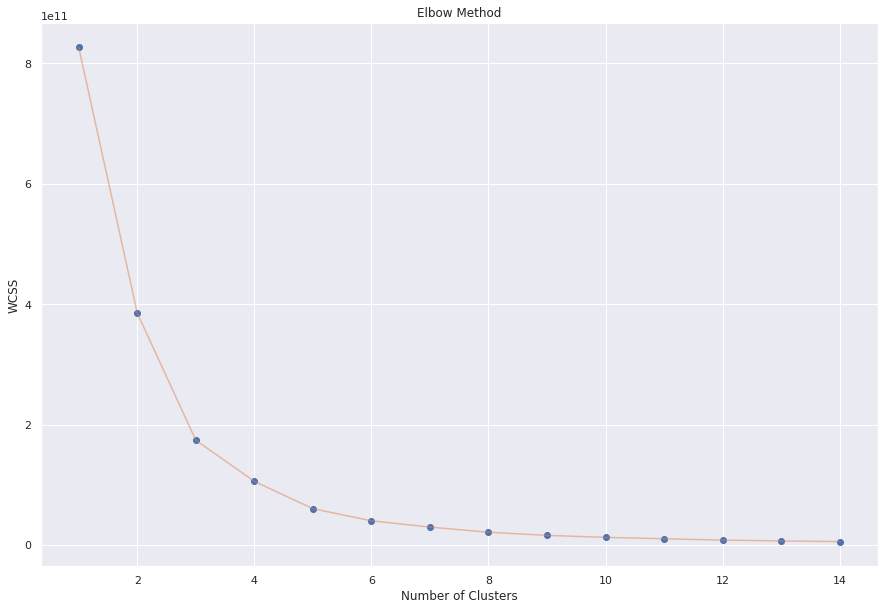

In [5]:
wcss = []
for i in range(1,15): # Testa 15 configurações diferentes
  # instanciando o modelo
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  # dando fit nos dados
  kmeans.fit(df_num)
  # salvando os resultados na lista
  wcss.append(kmeans.inertia_)

# plotando o Elbow Method  
plt.figure(figsize=(15,10))
plt.plot(range(1,15), wcss, 'o')
plt.plot(range(1 , 15) , wcss , '-' , alpha = 0.5)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.savefig('Elbow_Method.png')
plt.show()

**Elbow dos Dados Padronizados**

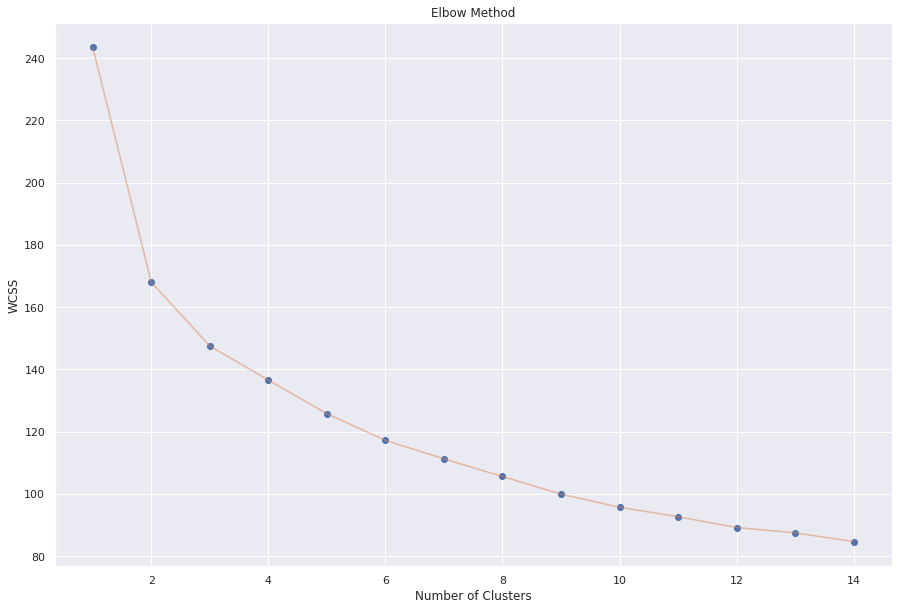

In [6]:
wcss = []
for i in range(1,15):
  # instanciando o modelo
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  # dando fit nos dados
  kmeans.fit(scaled)
  # salvando os resultados na lista
  wcss.append(kmeans.inertia_)
  
# plotando o Elbow Method  
plt.figure(figsize=(15,10))
plt.plot(range(1,15), wcss, 'o')
plt.plot(range(1 , 15) , wcss , '-' , alpha = 0.5)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.savefig('Elbow_Method.png')
plt.show()

**Verificando os resultados dos erros**

In [7]:
print('Lista Com Erros: ', wcss)

Lista Com Erros:  [243.41045994827238, 168.01043365483952, 147.5040317325812, 136.57941523049, 125.76854377064898, 117.19883003172328, 111.25783231874576, 105.59526740107572, 99.9326326976386, 95.7147490709151, 92.66125490489951, 89.20940285873435, 87.4882852011755, 84.68381664081177]


**Diferenças entre os elementos**

In [8]:
dif = np.diff(wcss)
print('Diferença Entre os Elementos: ', dif)

Diferença Entre os Elementos:  [-75.40002629 -20.50640192 -10.9246165  -10.81087146  -8.56971374
  -5.94099771  -5.66256492  -5.6626347   -4.21788363  -3.05349417
  -3.45185205  -1.72111766  -2.80446856]


**Dados Padronizados**

In [9]:
display(scaled)

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.86,0.819364,0.506928,0.454545,0.545212,0.0,0.038116,0.252951,0.000011,0.168483,0.903137,0.690948,0.086668,0.75
1,0.85,0.578035,0.729792,0.363636,0.706076,1.0,0.035657,0.059682,0.000000,0.975086,0.657677,0.508160,0.075697,0.75
2,0.85,0.660405,0.841801,0.909091,0.780177,0.0,0.062462,0.428185,0.000000,0.095816,0.870116,0.658797,0.161742,0.75
3,0.84,0.553468,0.789838,0.000000,0.637684,0.0,0.174966,0.074438,0.000000,0.374027,0.591635,0.902084,0.178135,0.75
4,0.84,0.380058,0.876443,1.000000,0.787439,1.0,0.070577,0.243728,0.000000,0.325236,0.719318,0.677181,0.150162,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.68,0.832370,0.508083,0.090909,0.432011,0.0,0.211853,0.621864,0.000863,0.344960,0.838195,0.211193,0.104096,0.75
296,0.68,0.713873,0.644342,0.090909,0.447217,0.0,0.039100,0.177119,0.000000,0.127998,0.660980,0.210981,0.183106,0.75
297,0.60,0.325145,0.206697,0.000000,0.118290,1.0,0.004303,0.862682,0.000331,0.141493,0.135938,0.103028,0.229338,0.75
298,0.60,0.420520,0.046189,0.272727,0.000000,1.0,0.004795,0.990777,0.066667,0.110350,0.170061,0.707300,0.106200,0.75


**Verificando o tamanho da Base de Dados**

Para utilizar a função *hopkins* precisamos passar exatamente o tamanho da base de dados.

In [10]:
len(scaled)

300

### Método Hopkins

- Como já falado, serve p'ra avaliar a capacidade de clusterizar e quanto mais próximo de 1, melhor.

- Acima de 0.5 pode se considerar agrupável, mas não é regra.


**Hopkins com os Dados Padronizados**

Veja que o valor está baixo, isso é indicativo que não há de fato agrupamento entre os dados e isso será comprovado através do método **VAT - Visual Assessment of Tendency**.

In [11]:
hopkins(scaled, 300)

0.270671243598893

**Dados Originais**

In [12]:
display(df_num)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,86.0,0.832,0.550,5.0,-7.026,0.0,0.0587,0.2490,0.000008,0.1820,0.881,154.064,152784.0,4.0
1,85.0,0.665,0.743,4.0,-4.434,1.0,0.0567,0.0604,0.000000,0.9590,0.658,131.573,147748.0,4.0
2,85.0,0.722,0.840,10.0,-3.240,0.0,0.0785,0.4200,0.000000,0.1120,0.851,150.108,187246.0,4.0
3,84.0,0.648,0.795,0.0,-5.536,0.0,0.1700,0.0748,0.000000,0.3800,0.598,180.043,194771.0,4.0
4,84.0,0.528,0.870,11.0,-3.123,1.0,0.0851,0.2400,0.000000,0.3330,0.714,152.370,181930.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,68.0,0.841,0.551,1.0,-8.850,0.0,0.2000,0.6090,0.000645,0.3520,0.822,95.033,160784.0,4.0
296,68.0,0.759,0.669,1.0,-8.605,0.0,0.0595,0.1750,0.000000,0.1430,0.661,95.007,197053.0,4.0
297,60.0,0.490,0.290,0.0,-13.905,1.0,0.0312,0.8440,0.000247,0.1560,0.184,81.724,218275.0,4.0
298,60.0,0.556,0.151,3.0,-15.811,1.0,0.0316,0.9690,0.049800,0.1260,0.215,156.076,161750.0,4.0


**Hopkins com os Dados Originais**

In [13]:
hopkins(df_num, 300)

0.061872209309733785

### Visual assessment of tendency

- Ou Avaliação Visual de Tendência.

- Similar ao gráfico de similaridade ordenada, encontrada no R.

- O gráfico granulado mostra que não há um agrupamento bem formado como é o caso dos dados escalados.

- Já no caso dos dados originais, também como já vimos no Hopkins, não há agrupamento entre os dados.

**VAT com Dados Padronizados**

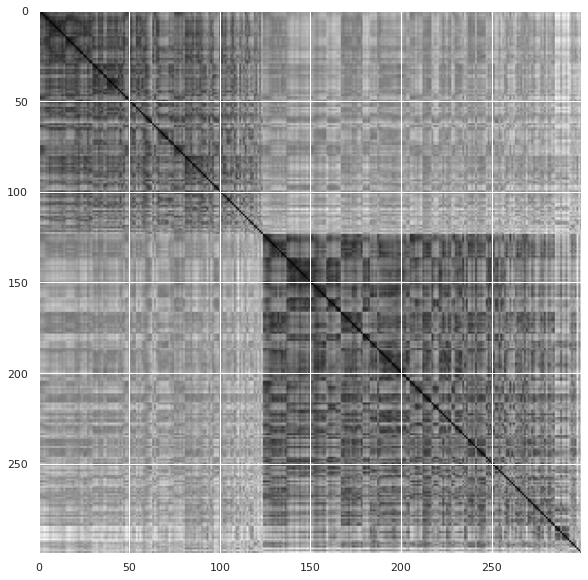

In [14]:
vat(scaled)

**VAT com Dados Originais**

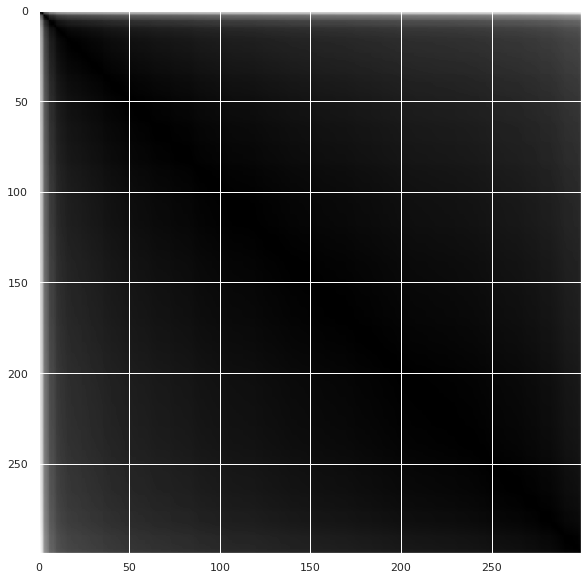

In [15]:
vat(df_num)

**Outra abordagem do VAT**

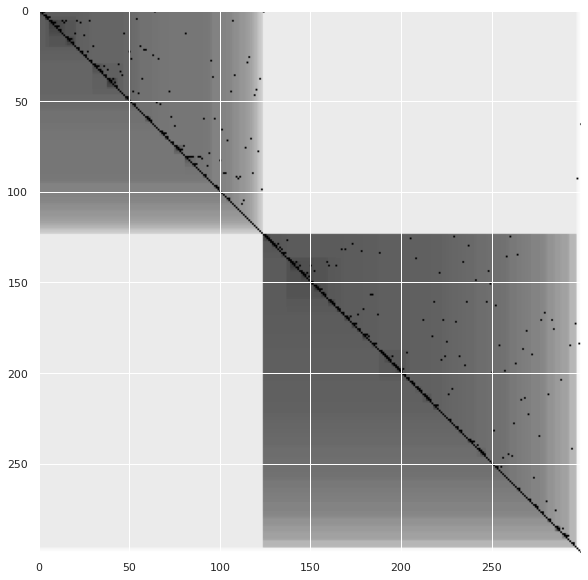

In [16]:
ivat(scaled)

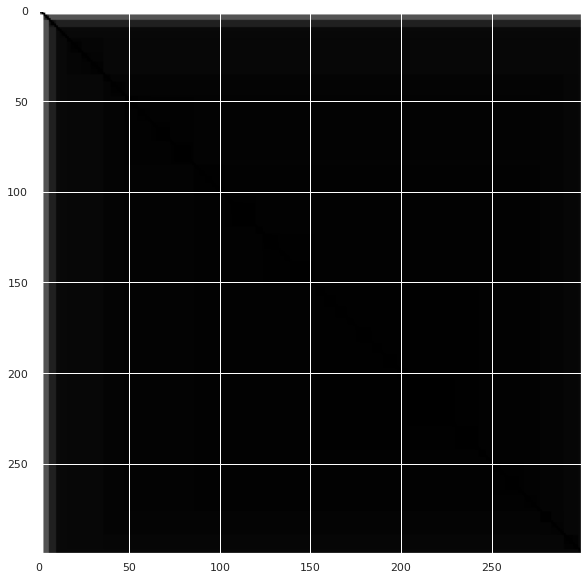

In [17]:
ivat(df_num)

### O que encontramos até aqui?

- Já vimos que o gráfico Elbow nos retorna que o número ideal de clusters é igual a 6. Outras abordagens como o silhouette poderá nos retornar outra coisa e isso acontece porque cada um trabalha de uma forma e é dever do Cientista de Dados saber qual considerar o correto.

- Não há *clusters* naturais nos dados, o que não significa que a gente não pode fazer essa separação.

- Pelo *hopkins* vimos que os dados escalados se sairam melhor que os originais na tentativa de criar os *clusters*, mas como definimos que o valores abaixo de 0.5 não têm clusters naturais, os dados não tem. Isso é reafirmado visualmente com o VAT, onde os dados padronizados aind estão um pouco granulados, já os originais não retorna nem um tipo de padrão.

### Silhouette

- O método é parecido com o Elbow. Aqui o métodio irá tentar minimizar o valor para zero, o quanto mais próximo, melhor.

- A partir do número que para ou tende a parar de diminuir, está o número ideal de cluster.

- Com a função `assess_tendency_by_metric()` precisamos passar os dados, método e número máximo de clusters que queremos testar.
  - Veja que, em ambos os casos, o número para de diminuir significativamente a partir do quarto cluster.
  - Os métodos da função são o 'silhouette', 'calinski_harabasz', 'davies_bouldin'.




**Dados Padronizados**

In [18]:
m = assess_tendency_by_metric(scaled,'silhouette', 10)
print(m)

(2, array([0.29764425, 0.23086556, 0.21829861, 0.18005004, 0.17478197,
       0.17408982, 0.18060357, 0.17134903, 0.16183222]))


**Dados Originais**

In [19]:
m = assess_tendency_by_metric(df_num,'silhouette', 10)
print(m)

(2, array([0.84920348, 0.56639561, 0.56698067, 0.53298127, 0.53328606,
       0.54535603, 0.53927324, 0.54367023, 0.5548621 ]))


**Número médio do melhor número de clusters dos três métodos**

- Dos métodos 'silhouette', 'calinski_harabasz', 'davies_bouldin'.

- Mais uma vez é descrepante os valores.


**Dados Padronizados**

In [20]:
m = assess_tendency_by_mean_metric_score(scaled,10)
print(m)

2.0


**Dados Originais**

In [21]:
m = assess_tendency_by_mean_metric_score(df_num, 10 )
print(m)

7.333333333333333


Nesse ponto, infelizmente o Python não pode mais ajudar e o R se torna bem melhor.

As perguntas 3 e 4 não podem ser respondidas aqui uma vez que não há bibliotecas prontas que façam os cálculos do Índice Dunn e do Validation Measures, por exemplo.


### No R:

`get_clust_tendency()` para ver graficamente o grau de similaridade, além do Hopkins Statistics.

- Cada uma das quatro métricas abaixo mostra um número ideal de clusters.

`fviz_nbclust(method = 'wss')` para criar o gráfico de cotovelo (Elbow).

`fviz_nbclust(method = 'silhouette')` para criar o gráfico de silhouette.

`gap = clusgap()` e `fviz_gap_stat(gap)` que melhora a estatística gap.

`NbClust()` tem gráfico de saída, Hubert Index e Índice D, ambos buscando um "joelho", aquele com aumento na medida, esse com aumento no valor da medida.

`Dunn Index`:

  x = kmeans(dados,centers = Nº de centros ou clusters)

  dunn = cluster.stats(d = dist(dados), x$cluster)

  dunn$dunn2

  Obs.: Executando só o objeto dunn há outras mátericas para avaliar os clusters.

`clvalid`:

  agrupadores = clvalid(dados, nClust = nº de clusters a serem testados Ex.: 2:10 , clMethods = c("hierarchical", "kmeans", "pam"), validation = "internal")

  summary(agrupadores)

c("hierarchical", "kmeans", "pam") são os métodos a serem testados

validation = "internal" é o tipo de validação.


### Quantos clusters utilizar?

Se seguirmos o Elbow usaremos o valor 6, se usarmos o Silhouette, utilizaremos 4, se usarmos a média, utilizaremos o valor 2. 

**O que utilizar?**

Como já falei, é dever do Cientista de Dados tomar uma decisão. Como já vimos que não há cluster natural, e o Elbow que é o mais utilizado nos retorna 6 e é o maior número de clusters que conseguimos, então a partir de agora iremos instanciar o modelo com o número de clusters.



### Instanciando o Modelo e Criando o Modelo

**Instanciando o Modelo**

In [22]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(scaled)

**Clusters**

In [23]:
y_kmeans

array([0, 1, 0, 5, 4, 0, 4, 5, 2, 2, 1, 0, 5, 4, 4, 4, 2, 0, 1, 1, 4, 4,
       4, 1, 0, 2, 1, 1, 2, 2, 1, 1, 4, 4, 0, 1, 2, 4, 4, 4, 1, 0, 1, 0,
       2, 1, 2, 4, 0, 1, 1, 2, 4, 4, 4, 2, 0, 2, 0, 0, 0, 0, 1, 5, 1, 5,
       0, 2, 5, 5, 2, 5, 3, 4, 3, 1, 0, 2, 0, 0, 5, 4, 4, 0, 1, 1, 4, 4,
       4, 0, 0, 2, 0, 1, 0, 0, 0, 1, 5, 0, 0, 4, 0, 4, 2, 1, 4, 2, 3, 1,
       1, 0, 4, 2, 0, 1, 0, 4, 5, 5, 4, 2, 5, 0, 4, 1, 4, 5, 5, 4, 1, 5,
       4, 2, 4, 0, 0, 5, 5, 0, 5, 0, 0, 0, 0, 2, 1, 0, 0, 0, 5, 2, 5, 5,
       4, 0, 2, 1, 2, 1, 5, 0, 2, 1, 1, 2, 1, 4, 0, 4, 5, 0, 1, 2, 4, 1,
       1, 2, 1, 2, 5, 1, 4, 4, 2, 5, 4, 0, 4, 0, 0, 1, 4, 4, 0, 2, 0, 1,
       2, 1, 4, 0, 0, 2, 4, 0, 3, 2, 1, 2, 1, 5, 1, 1, 0, 1, 4, 5, 4, 1,
       1, 0, 0, 0, 0, 5, 5, 1, 0, 5, 3, 4, 5, 2, 4, 1, 2, 0, 0, 4, 0, 4,
       2, 4, 5, 4, 2, 5, 0, 5, 0, 4, 4, 1, 1, 0, 5, 0, 5, 4, 0, 1, 4, 2,
       5, 0, 5, 4, 5, 5, 4, 3, 0, 2, 2, 0, 0, 2, 4, 0, 2, 5, 0, 3, 5, 0,
       0, 0, 0, 4, 5, 3, 3, 4, 0, 5, 5, 3, 3, 4], d

**Visualizando graficamente os clusters**

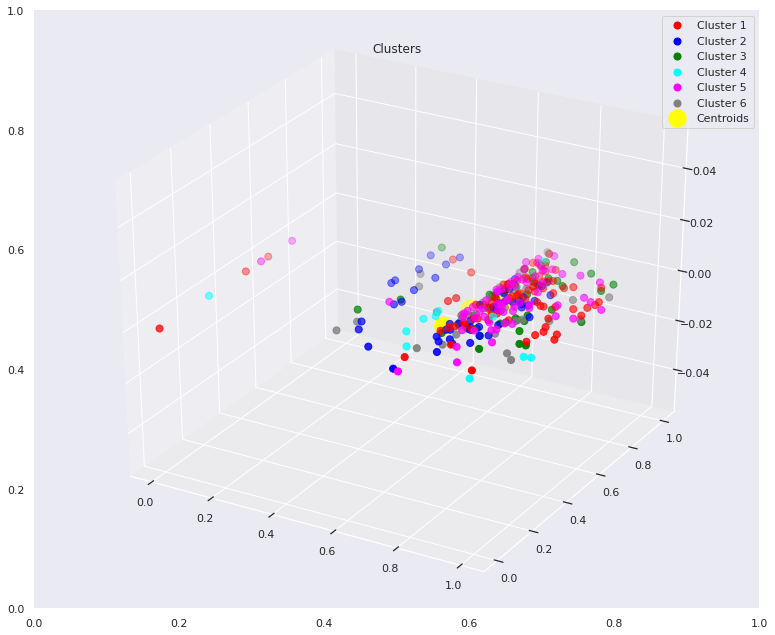

In [24]:
# visualizando os clusters
fig, ax = plt.subplots(figsize=(13,11))
scaled = scaler.fit_transform(df_num)
# definindo a figura em 3 dimensões
ax = fig.add_subplot(111, projection='3d')
# plotando os clusters
plt.scatter(scaled[y_kmeans == 0,0], scaled[y_kmeans == 0,1], s= 50, c= 'red',label= 'Cluster 1')
plt.scatter(scaled[y_kmeans == 1,0], scaled[y_kmeans == 1,1], s= 50, c= 'blue', label= 'Cluster 2')
plt.scatter(scaled[y_kmeans == 2,0], scaled[y_kmeans == 2,1], s= 50, c= 'green', label= 'Cluster 3')
plt.scatter(scaled[y_kmeans == 3,0], scaled[y_kmeans == 3,1], s= 50, c= 'cyan', label= 'Cluster 4')
plt.scatter(scaled[y_kmeans == 4,0], scaled[y_kmeans == 4,1], s= 50, c= 'magenta', label= 'Cluster 5')
plt.scatter(scaled[y_kmeans == 5,0], scaled[y_kmeans == 5,1], s= 50, c= 'gray', label= 'Cluster 6')


# centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s= 300, c= 'yellow', label= 'Centroids')
plt.title('Clusters')
plt.legend()
plt.savefig('clusters.png')
plt.show()

**Acessando os dados em duas dimensões**

In [25]:
scaled[y_kmeans == 0,0]

array([0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.79, 0.78, 0.78, 0.77, 0.97,
       0.96, 0.76, 0.76, 0.76, 0.76, 0.76, 0.75, 0.75, 0.76, 0.98, 0.75,
       0.75, 0.74, 0.9 , 0.74, 0.74, 0.74, 0.75, 0.74, 0.73, 0.78, 0.79,
       0.72, 0.72, 0.97, 0.97, 0.72, 0.93, 0.92, 0.72, 0.56, 0.72, 0.71,
       0.93, 0.47, 0.92, 0.71, 0.71, 0.71, 0.7 , 0.7 , 0.6 , 0.7 , 0.7 ,
       0.7 , 0.75, 0.69, 0.97, 0.69, 0.69, 0.  , 0.  , 0.  , 0.69, 0.93,
       0.71, 0.68, 0.68, 0.7 , 0.68, 0.88, 0.68, 0.68, 0.68, 0.69, 0.88,
       0.84, 0.61, 0.92])

**Acessando a terceira dimensão**

In [26]:
scaled[y_kmeans == 0,1]

array([0.81936416, 0.66040462, 0.80057803, 0.75433526, 0.67774566,
       0.53034682, 0.82803468, 0.73843931, 0.68208092, 0.81213873,
       0.76445087, 0.71387283, 0.73699422, 0.78901734, 0.55346821,
       0.50289017, 0.76589595, 0.68786127, 0.54046243, 0.90028902,
       0.48121387, 0.7066474 , 0.31069364, 0.83815029, 0.59537572,
       0.87572254, 0.6632948 , 0.80057803, 0.42630058, 0.67774566,
       0.49710983, 0.82225434, 0.76878613, 0.91184971, 0.44219653,
       0.65895954, 0.74132948, 0.57947977, 0.68641618, 0.43063584,
       0.49132948, 0.76445087, 0.80491329, 0.61127168, 0.85549133,
       0.81791908, 0.48121387, 0.45520231, 0.81358382, 0.64017341,
       0.78179191, 0.71098266, 0.55924855, 0.75144509, 0.42052023,
       0.58815029, 0.69653179, 0.74710983, 0.51445087, 0.40462428,
       0.99277457, 0.57080925, 0.        , 0.44942197, 0.91907514,
       0.51156069, 0.90462428, 0.5765896 , 0.91184971, 0.64884393,
       0.17774566, 0.19508671, 0.86416185, 0.37572254, 0.73699

**Dados Padronizados**

In [27]:
pd.DataFrame(scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.86,0.819364,0.506928,0.454545,0.545212,0.0,0.038116,0.252951,0.000011,0.168483,0.903137,0.690948,0.086668,0.75
1,0.85,0.578035,0.729792,0.363636,0.706076,1.0,0.035657,0.059682,0.000000,0.975086,0.657677,0.508160,0.075697,0.75
2,0.85,0.660405,0.841801,0.909091,0.780177,0.0,0.062462,0.428185,0.000000,0.095816,0.870116,0.658797,0.161742,0.75
3,0.84,0.553468,0.789838,0.000000,0.637684,0.0,0.174966,0.074438,0.000000,0.374027,0.591635,0.902084,0.178135,0.75
4,0.84,0.380058,0.876443,1.000000,0.787439,1.0,0.070577,0.243728,0.000000,0.325236,0.719318,0.677181,0.150162,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.68,0.832370,0.508083,0.090909,0.432011,0.0,0.211853,0.621864,0.000863,0.344960,0.838195,0.211193,0.104096,0.75
296,0.68,0.713873,0.644342,0.090909,0.447217,0.0,0.039100,0.177119,0.000000,0.127998,0.660980,0.210981,0.183106,0.75
297,0.60,0.325145,0.206697,0.000000,0.118290,1.0,0.004303,0.862682,0.000331,0.141493,0.135938,0.103028,0.229338,0.75
298,0.60,0.420520,0.046189,0.272727,0.000000,1.0,0.004795,0.990777,0.066667,0.110350,0.170061,0.707300,0.106200,0.75


**Convertendo as previsões para um dataframe e visualizando**

In [28]:
# Convertendo as previsões para um dataframe

kmeans = pd.DataFrame(data=y_kmeans, dtype=int)
kmeans.columns = ['cluster']

# previsões como um dataframe

print(kmeans.shape)
kmeans.head()

(300, 1)


,cluster
0,0
1,1
2,0
3,5
4,4


**Concatenando os clusters**

In [29]:
# concatenando os clusters 
df = pd.concat([df, kmeans], axis=1)

# conferindo os dataframes
print(df.shape)
df.head()

(300, 18)


,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,Dadá Boladão,Surtada - Remix Brega Funk,5F8ffc8KWKNawllr5WsW0r,86,0.832,0.550,5,-7.026,0,0.0587,0.2490,0.000008,0.182,0.881,154.064,152784,4,0
1,Marília Mendonça,Supera - Ao Vivo,3GmJxfnUDrIs1iCfKUELFz,85,0.665,0.743,4,-4.434,1,0.0567,0.0604,0.000000,0.959,0.658,131.573,147748,4,1
2,MC Du Black,Gaiola É o Troco,3Uq45ipGutypFPmETfaoaH,85,0.722,0.840,10,-3.240,0,0.0785,0.4200,0.000000,0.112,0.851,150.108,187246,4,0
3,Anitta,Some que ele vem atrás,2qD7VoDYcrAPY0cVEfpsR5,84,0.648,0.795,0,-5.536,0,0.1700,0.0748,0.000000,0.380,0.598,180.043,194771,4,5
4,Jorge & Mateus,Cheirosa - Ao Vivo,2PWjKmjyTZeDpmOUa3a5da,84,0.528,0.870,11,-3.123,1,0.0851,0.2400,0.000000,0.333,0.714,152.370,181930,4,4


**Checando os Valores Nulos**

In [30]:
(df.isnull().sum()/ df.shape[0]).sort_values(ascending=False)

cluster             0.0
time_signature      0.0
track_name          0.0
track_id            0.0
popularity          0.0
danceability        0.0
energy              0.0
key                 0.0
loudness            0.0
mode                0.0
speechiness         0.0
acousticness        0.0
instrumentalness    0.0
liveness            0.0
valence             0.0
tempo               0.0
duration_ms         0.0
artist_name         0.0
dtype: float64

**Média de popularidade por cluster**

In [31]:
df.groupby(['cluster']).popularity.mean().sort_values(ascending=False)

cluster
2    76.111111
0    73.975000
4    73.421875
5    72.434783
1    67.888889
3    67.090909
Name: popularity, dtype: float64

**Conferindo o número de músicas por cluster**

In [32]:
df['cluster'].value_counts()

0    80
4    64
1    54
5    46
2    45
3    11
Name: cluster, dtype: int64

**Checando as músicas no cluster**

In [33]:
df.loc[df['cluster'] == 3][:10]

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
72,MC Kevin o Chris,Ela É do Tipo,2x8TNY9KwNvD19gVGs4WOP,76,0.632,0.398,6,-6.615,1,0.3730,0.945,0.000000,0.2280,0.6330,90.695,204931,4,3
74,Selena Gomez,Lose You To Love Me,1HfMVBKM75vxSfsQ5VefZ5,98,0.505,0.340,4,-9.005,1,0.0438,0.576,0.000000,0.2100,0.0916,101.993,206459,4,3
108,Lewis Capaldi,Someone You Loved,7qEHsqek33rTcFNT9PFqLf,96,0.501,0.405,1,-5.679,1,0.0319,0.751,0.000000,0.1050,0.4460,109.891,182161,4,3
206,MC Caverinha,Flash,3UEm2avDtIIaT3UvuvsxES,70,0.913,0.366,7,-14.341,1,0.3290,0.731,0.000023,0.1480,0.1230,125.035,155937,4,3
230,ANAVITÓRIA,relicário,1fZgxJgmmOl8zCyHgcKAWE,65,0.431,0.260,0,-12.001,1,0.0382,0.840,0.000150,0.1040,0.1570,159.567,245539,3,3
271,ANAVITÓRIA,pra você guardei o amor,1TNXJFbHrXe3gVch3HxD7p,62,0.579,0.221,2,-13.962,1,0.0325,0.928,0.002670,0.1090,0.3140,77.113,228785,4,3
283,Billie Eilish,when the party's over,43zdsphuZLzwA9k4DJhU0I,90,0.367,0.111,4,-14.084,1,0.0972,0.978,0.000040,0.0897,0.1980,82.642,196077,4,3
291,ANAVITÓRIA,por onde andei,22AAo9zdJD18OX6tC1VR95,61,0.602,0.474,0,-11.731,1,0.0647,0.925,0.011100,0.1940,0.4330,168.035,208573,4,3
292,Maroon 5,Happy Christmas (War Is Over) - Bonus Track,1nEN1kpLEZ0sJWKRUQT03k,0,0.441,0.157,2,-10.792,1,0.0307,0.936,0.000000,0.1070,0.1860,143.241,206707,3,3
297,ANAVITÓRIA,as coisas tão mais lindas,2qvSChyYgm8ybTncALA4pD,60,0.490,0.290,0,-13.905,1,0.0312,0.844,0.000247,0.1560,0.1840,81.724,218275,4,3


# Obrigado!

Obrigado por ter disponibilizado um pouco do seu tempo e atenção aqui. Espero que, de alguma forma, tenha sido útil para seu crescimento. Se houver qualquer dúvida ou sugestão, não hesite em entrar em contato no [LinkedIn](https://www.linkedin.com/in/daniel-sousa-amador) e verificar meus outros projetos no [GitHub](https://github.com/amadords).

[![LinkedIn](https://img.shields.io/badge/LinkedIn-DanielSousaAmador-cyan.svg)](https://www.linkedin.com/in/daniel-sousa-amador)
[![GitHub](https://img.shields.io/badge/GitHub-amadords-darkblue.svg)](https://github.com/amadords)
[![Medium](https://img.shields.io/badge/Medium-DanielSousaAmador-white.svg)](https://daniel-s-amador.medium.com/)


<center><img width="90%" src="https://raw.githubusercontent.com/danielamador12/Portfolio/master/github.png"></center>

Material baseado nos trabalhos da [Sigmoidal](https://sigmoidal.ai/) na Escola de Data Science e do [Professor Fernando Amaral](https://datascientist.com.br/) na Formação Cientista de Dados - Tópicos Avançados.